In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

In [2]:
cop=pd.read_csv("C:/Users/deepa/Downloads/COP.csv")
cop.drop(['Open','High','Low','Close','Volume'],axis=1,inplace=True)
cop=cop.rename(columns={'Adj Close':'cop price'})

In [3]:
cop.head()

,Date,cop price
0,2014-04-01,60.767567
1,2014-04-02,61.268871
2,2014-04-03,60.672504
3,2014-04-04,60.689789
4,2014-04-07,60.050213


In [4]:
cop.tail()

,Date,cop price
1253,2019-03-25,67.070000
1254,2019-03-26,68.559998
1255,2019-03-27,67.910004
1256,2019-03-28,67.379997
1257,2019-03-29,66.739998


In [5]:
cop['Date']=cop['Date'].astype(str)

In [6]:
crudefuture=pd.read_csv('C:/Class/mba 524/Crude Oil WTI Futures Historical Data.csv')
crudefuture.drop(['Open','High','Low','Vol.','Change %'],axis=1,inplace=True)
crudefuture=crudefuture.rename(columns={'Price':'crudefutureprice'})


In [7]:
crudefuture.head()

,Date,crudefutureprice
0,2014-04-01,99.74
1,2014-04-02,99.62
2,2014-04-03,100.29
3,2014-04-04,101.14
4,2014-04-07,100.44


In [244]:
crudefuture.tail()

,Date,crudefutureprice
1312,2019-03-25,58.82
1313,2019-03-26,59.94
1314,2019-03-27,59.41
1315,2019-03-28,59.30
1316,2019-03-29,60.14


In [8]:
Natgasfuture=pd.read_csv('C:/Class/mba 524/Natural Gas Futures Historical Data.csv')
Natgasfuture.drop(['Open','High','Low','Vol.','Change %'],axis=1,inplace=True)
Natgasfuture=Natgasfuture.rename(columns={'Price':'Natgasfutureprice'})

In [9]:
Natgasfuture.head()

,Date,Natgasfutureprice
0,2014-04-01,4.276
1,2014-04-02,4.364
2,2014-04-03,4.470
3,2014-04-04,4.439
4,2014-04-07,4.476


In [10]:
Natgasfuture.tail()

,Date,Natgasfutureprice
1311,2019-03-25,2.755
1312,2019-03-26,2.740
1313,2019-03-27,2.713
1314,2019-03-28,2.712
1315,2019-03-29,2.662


In [11]:
crude=pd.read_excel('C:/Class/mba 524/crudeprice.xls')


In [12]:
crude.head()

,Date,Crude Price
0,2014-04-01,99.69
1,2014-04-02,99.60
2,2014-04-03,100.29
3,2014-04-04,101.16
4,2014-04-07,100.43


In [13]:
crude.tail()

,Date,Crude Price
1299,2019-03-25,58.71
1300,2019-03-26,59.87
1301,2019-03-27,59.39
1302,2019-03-28,59.29
1303,2019-03-29,60.19


In [14]:
crude['Date']=crude['Date'].astype(str)

In [15]:
natgas=pd.read_excel('C:/Class/mba 524/natural gas prices.xls',sheet_name='nat')
natgas['Date']=natgas['Date'].astype(str)

In [16]:
natgas=natgas[4314:5591]

In [17]:
natgas.head()

,Date,Natural gas price
4314,2014-04-01,4.39
4315,2014-04-02,4.39
4316,2014-04-03,4.51
4317,2014-04-04,4.49
4318,2014-04-07,4.58


In [18]:
natgas.tail()

,Date,Natural gas price
5586,2019-03-25,2.72
5587,2019-03-26,2.74
5588,2019-03-27,2.69
5589,2019-03-28,2.69
5590,2019-03-29,2.73


In [19]:
df1=pd.merge(cop,crudefuture,on='Date')

In [20]:
df2=pd.merge(df1,Natgasfuture,on='Date')

In [21]:
df3=pd.merge(df2,crude,on='Date')

In [22]:
Finaldf=pd.merge(df3,natgas,on='Date')

In [23]:
Finaldf.head()

,Date,cop price,crudefutureprice,Natgasfutureprice,Crude Price,Natural gas price
0,2014-04-01,60.767567,99.74,4.276,99.69,4.39
1,2014-04-02,61.268871,99.62,4.364,99.60,4.39
2,2014-04-03,60.672504,100.29,4.470,100.29,4.51
3,2014-04-04,60.689789,101.14,4.439,101.16,4.49
4,2014-04-07,60.050213,100.44,4.476,100.43,4.58


In [24]:
Finaldf.tail()

,Date,cop price,crudefutureprice,Natgasfutureprice,Crude Price,Natural gas price
1250,2019-03-25,67.070000,58.82,2.755,58.71,2.72
1251,2019-03-26,68.559998,59.94,2.740,59.87,2.74
1252,2019-03-27,67.910004,59.41,2.713,59.39,2.69
1253,2019-03-28,67.379997,59.30,2.712,59.29,2.69
1254,2019-03-29,66.739998,60.14,2.662,60.19,2.73


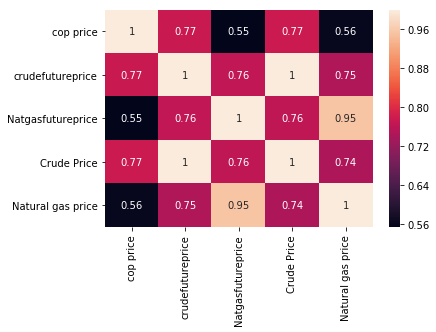

In [25]:
sns.heatmap(Finaldf.corr(),annot=True)

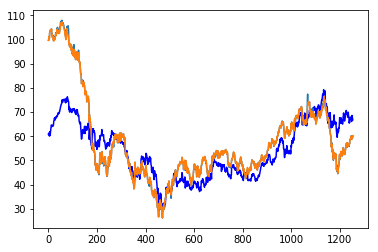

In [26]:
plt.plot(Finaldf['cop price'],'b')
plt.plot(Finaldf['Crude Price'])
plt.plot(Finaldf['crudefutureprice'])

In [27]:
Finaldf.columns

Index(['Date', 'cop price', 'crudefutureprice', 'Natgasfutureprice',
       'Crude Price', 'Natural gas price'],
      dtype='object')

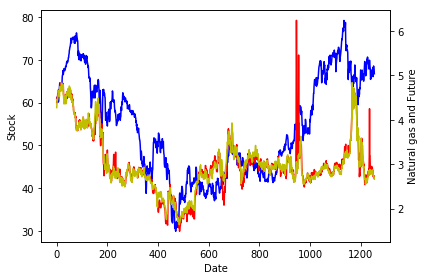

In [28]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Date')
ax1.set_ylabel('Stock')
ax1.plot(Finaldf['cop price'],'b')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Natural gas and Future')  # we already handled the x-label with ax1
ax2.plot(Finaldf['Natural gas price'],'r')
ax2.plot(Finaldf['Natgasfutureprice'],'y')
ax2.tick_params(axis='y')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

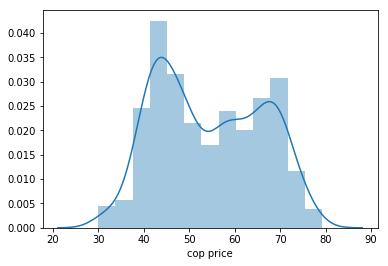

In [266]:
sns.distplot(Finaldf['cop price'])

In [29]:
X=Finaldf[['crudefutureprice', 'Natgasfutureprice','Crude Price', 'Natural gas price']]
Y=Finaldf['cop price']

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.5)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
clrm=LinearRegression()

In [36]:
clrm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
print(clrm.intercept_)

28.98191807464366


In [38]:
clrm.coef_

array([ -0.30897899, -11.20318469,   0.88238144,   8.56268789])

In [39]:
coeff_df=pd.DataFrame(clrm.coef_,X.columns,columns=['Coeff'])

In [40]:
coeff_df

,Coeff
crudefutureprice,-0.308979
Natgasfutureprice,-11.203185
Crude Price,0.882381
Natural gas price,8.562688


In [41]:
predictions=clrm.predict(X_test)

In [278]:
print(predictions.mean(),predictions.std())

54.195819409257 8.955379390812968


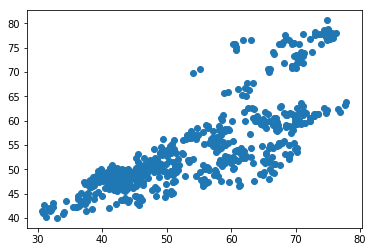

In [279]:
plt.scatter(Y_test,predictions)

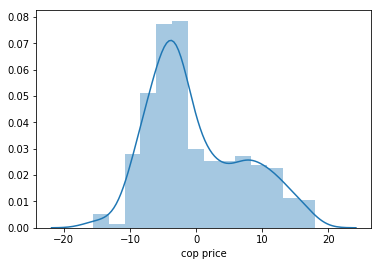

In [280]:
sns.distplot((Y_test-predictions))

In [281]:
from sklearn import metrics

In [282]:
metrics.r2_score(Y_test,predictions)

0.6315248021564612

In [283]:
print(metrics.mean_absolute_error(Y_test,predictions),metrics.mean_squared_error(Y_test,predictions),
      np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

5.968127207144803 50.94106045503535 7.137300642051962
